![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Sierra Mecalo-Schwigen
***

## Overview

With the growing success of the movie industry, Microsoft has made the decision to start their own movie studio. In order to assist them in determining which genre of movie to select
for their first film, analysis of movie production data must be completed. The analysis of data from IMDB and The Numbers will be used to determine the success of movies in
dollars spent vs. dollars earned. Results of the analysis can be used to strategically select which movie genre Microsoft should consider creating to optimize potential profits.

## Business Problem

This analysis will be examining which movie genre provides the highest profit potential. The guiding questions to be used are:
***
1. What is the highest grossing genres?
2. Which of those genres provides the highest return on investment?
3. Is there a correlation between movie run time and ROl?
***
Using the results of the data found while exploring the above questions, three business recommendations will be provided to Microsoft for consideration when selecting their first film production.

## Data Understanding

Scraped data from IMDB and The Numbers will be used for this analysis. These are reputable databases that provide information on the movie industry.
The data scraped from IMDB includes movie title, runtime in minutes,
and movie genre. The data scraped from The Numbers includes movie title, production budget, domestic gross revenue, and worldwide gross revenue.
The Python library CPI will also be used to adjust for inflation using the Consumer Price Index.
***
Variables that will be explored include genres, production budget, release year, runtime minutes, and worldwide gross.
Variables to be added for exploration are inflation adjusted production budget and worldwide gross, profit, and roi.
***

In [1]:
# Import standard packages
import cpi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('mode.chained_assignment',None)

In [3]:
# IMDB Title Basics Data

df_imdb_titles = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz")
df_imdb_titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
df_imdb_titles.info()
# will need to select between primary_title and original_title
# will need to identify missing values in genres column and runtime_minutes column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
# The Numbers Movie Budgets Data

df_tn_budgets = pd.read_csv("data/zippedData/tn.movie_budgets.csv.gz")
df_tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
df_tn_budgets.info()
# need to convert production_budget, domestic_gross, and worldwide_gross to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

Analysis started by merging the datasets on the Primary Title and Movie columns. Then unnecessary
columns were dropped from the dataframe. After referring to the above dataframes information, the production budget and worldwide gross columns were converted to float data types. Once this was complete the merged dataset was checked for missing values and entries that were missing information in the 'genres' column were dropped. For entries containing multipe genres, each entry was exploded into individual entries for each genre specified. Genres with less than 100 movies were then dropped. The dataframe was checked for movies missing information in the worldwide gross column and those entries were removed from the dataframe. A column was then added that subtracts production budget from worldwide gross to determine profit, and was sorted in descending order. The production budget, profit, and worldwide gross columns were adjusted for inflation to 2021.

In [7]:
# merge datasets
df = df_imdb_titles.merge(df_tn_budgets, 
                                  left_on='primary_title', 
                                  right_on='movie') 
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


In [8]:
# drop unnecessary columns
df.drop(columns=['tconst', 'original_title', 'id', 'movie', 'start_year', 'domestic_gross'], inplace=True)
df

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross
0,Foodfight!,91.0,"Action,Animation,Comedy","Dec 31, 2012","$45,000,000","$73,706"
1,Mortal Kombat,NaN,"Action,Adventure,Fantasy","Aug 18, 1995","$20,000,000","$122,133,227"
2,The Overnight,88.0,NaN,"Jun 19, 2015","$200,000","$1,165,996"
3,The Overnight,79.0,"Comedy,Mystery","Jun 19, 2015","$200,000","$1,165,996"
4,On the Road,124.0,"Adventure,Drama,Romance","Mar 22, 2013","$25,000,000","$9,313,302"
...,...,...,...,...,...,...
3810,Fuel,NaN,"Documentary,Sport","Nov 14, 2008","$2,500,000","$174,255"
3811,Diner,NaN,Crime,"Apr 2, 1982","$5,000,000","$12,592,907"
3812,Traitor,110.0,"Action,Drama,Romance","Aug 27, 2008","$22,000,000","$27,882,226"
3813,Ray,111.0,Crime,"Oct 29, 2004","$40,000,000","$124,823,094"


In [9]:
# remove month and day from release date
df['release_date'] = df['release_date'].map(lambda x : x[-4:]).astype(int)
df

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross
0,Foodfight!,91.0,"Action,Animation,Comedy",2012,"$45,000,000","$73,706"
1,Mortal Kombat,NaN,"Action,Adventure,Fantasy",1995,"$20,000,000","$122,133,227"
2,The Overnight,88.0,NaN,2015,"$200,000","$1,165,996"
3,The Overnight,79.0,"Comedy,Mystery",2015,"$200,000","$1,165,996"
4,On the Road,124.0,"Adventure,Drama,Romance",2013,"$25,000,000","$9,313,302"
...,...,...,...,...,...,...
3810,Fuel,NaN,"Documentary,Sport",2008,"$2,500,000","$174,255"
3811,Diner,NaN,Crime,1982,"$5,000,000","$12,592,907"
3812,Traitor,110.0,"Action,Drama,Romance",2008,"$22,000,000","$27,882,226"
3813,Ray,111.0,Crime,2004,"$40,000,000","$124,823,094"


In [10]:
# convert production_budget, domestic_gross, and worldwide_gross to float
df[df.columns[4:7]] = df[df.columns[4:7]].replace('[\$,]', '', regex=True).astype(float)

In [11]:
# check for missing data
df.isnull().sum()

primary_title          0
runtime_minutes      487
genres                72
release_date           0
production_budget      0
worldwide_gross        0
dtype: int64

In [12]:
# split multiple genres into individual rows
df['genres'] = df['genres'].str.strip().str.split(',')
df = df.explode('genres').reset_index(drop=True)
df

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross
0,Foodfight!,91.0,Action,2012,45000000.0,73706.0
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0
2,Foodfight!,91.0,Comedy,2012,45000000.0,73706.0
3,Mortal Kombat,NaN,Action,1995,20000000.0,122133227.0
4,Mortal Kombat,NaN,Adventure,1995,20000000.0,122133227.0
...,...,...,...,...,...,...
7863,Traitor,110.0,Action,2008,22000000.0,27882226.0
7864,Traitor,110.0,Drama,2008,22000000.0,27882226.0
7865,Traitor,110.0,Romance,2008,22000000.0,27882226.0
7866,Ray,111.0,Crime,2004,40000000.0,124823094.0


In [13]:
# drop movies missing genre
df.dropna(axis=0, subset=['genres'], inplace=True)
df

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross
0,Foodfight!,91.0,Action,2012,45000000.0,73706.0
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0
2,Foodfight!,91.0,Comedy,2012,45000000.0,73706.0
3,Mortal Kombat,NaN,Action,1995,20000000.0,122133227.0
4,Mortal Kombat,NaN,Adventure,1995,20000000.0,122133227.0
...,...,...,...,...,...,...
7863,Traitor,110.0,Action,2008,22000000.0,27882226.0
7864,Traitor,110.0,Drama,2008,22000000.0,27882226.0
7865,Traitor,110.0,Romance,2008,22000000.0,27882226.0
7866,Ray,111.0,Crime,2004,40000000.0,124823094.0


In [14]:
# check genre value counts
df['genres'].value_counts()

Drama          1817
Comedy          842
Action          710
Thriller        594
Documentary     499
Adventure       490
Horror          415
Crime           398
Romance         372
Mystery         249
Biography       248
Sci-Fi          229
Family          204
Fantasy         202
Animation       148
History          96
Music            87
Sport            75
War              53
Musical          35
Western          25
News              7
Reality-TV        1
Name: genres, dtype: int64

In [15]:
# drop genres with movie counts under 100
df.drop(df.index[df['genres'] == 'News'], inplace=True)
df.drop(df.index[df['genres'] == 'History'], inplace=True)
df.drop(df.index[df['genres'] == 'Music'], inplace=True)
df.drop(df.index[df['genres'] == 'Sport'], inplace=True)
df.drop(df.index[df['genres'] == 'War'], inplace=True)
df.drop(df.index[df['genres'] == 'Musical'], inplace=True)
df.drop(df.index[df['genres'] == 'Western'], inplace=True)
df.drop(df.index[df['genres'] == 'Reality-TV'], inplace=True)
df

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross
0,Foodfight!,91.0,Action,2012,45000000.0,73706.0
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0
2,Foodfight!,91.0,Comedy,2012,45000000.0,73706.0
3,Mortal Kombat,NaN,Action,1995,20000000.0,122133227.0
4,Mortal Kombat,NaN,Adventure,1995,20000000.0,122133227.0
...,...,...,...,...,...,...
7863,Traitor,110.0,Action,2008,22000000.0,27882226.0
7864,Traitor,110.0,Drama,2008,22000000.0,27882226.0
7865,Traitor,110.0,Romance,2008,22000000.0,27882226.0
7866,Ray,111.0,Crime,2004,40000000.0,124823094.0


In [16]:
# check for missing worldwide_gross values
df[(df['worldwide_gross']==0)]

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross
31,Anderson's Cross,98.0,Comedy,2010,300000.0,0.0
32,Anderson's Cross,98.0,Drama,2010,300000.0,0.0
33,Anderson's Cross,98.0,Romance,2010,300000.0,0.0
105,House at the End of the Drive,91.0,Horror,2014,1400000.0,0.0
106,House at the End of the Drive,91.0,Thriller,2014,1400000.0,0.0
...,...,...,...,...,...,...
7808,Blinded by the Light,117.0,Biography,2019,15000000.0,0.0
7809,Blinded by the Light,117.0,Comedy,2019,15000000.0,0.0
7810,Blinded by the Light,117.0,Drama,2019,15000000.0,0.0
7822,The Deported,NaN,Documentary,2009,3000000.0,0.0


In [17]:
# remove movies missing worldwide_gross data
df = df[~(df['worldwide_gross']==0)]
df

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross
0,Foodfight!,91.0,Action,2012,45000000.0,73706.0
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0
2,Foodfight!,91.0,Comedy,2012,45000000.0,73706.0
3,Mortal Kombat,NaN,Action,1995,20000000.0,122133227.0
4,Mortal Kombat,NaN,Adventure,1995,20000000.0,122133227.0
...,...,...,...,...,...,...
7862,Diner,NaN,Crime,1982,5000000.0,12592907.0
7863,Traitor,110.0,Action,2008,22000000.0,27882226.0
7864,Traitor,110.0,Drama,2008,22000000.0,27882226.0
7865,Traitor,110.0,Romance,2008,22000000.0,27882226.0


In [18]:
#adjust production budget for inflation to 2021
df['adjusted_budget'] = df.apply(lambda x: cpi.inflate(x.production_budget, x.release_date), axis=1)
df

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget
0,Foodfight!,91.0,Action,2012,45000000.0,73706.0,5.310962e+07
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0,5.310962e+07
2,Foodfight!,91.0,Comedy,2012,45000000.0,73706.0,5.310962e+07
3,Mortal Kombat,NaN,Action,1995,20000000.0,122133227.0,3.556037e+07
4,Mortal Kombat,NaN,Adventure,1995,20000000.0,122133227.0,3.556037e+07
...,...,...,...,...,...,...,...
7862,Diner,NaN,Crime,1982,5000000.0,12592907.0,1.403990e+07
7863,Traitor,110.0,Action,2008,22000000.0,27882226.0,2.768814e+07
7864,Traitor,110.0,Drama,2008,22000000.0,27882226.0,2.768814e+07
7865,Traitor,110.0,Romance,2008,22000000.0,27882226.0,2.768814e+07


In [19]:
#adjust worldwide gross for inflation to 2021
df['adjusted_gross'] = df.apply(lambda x: cpi.inflate(x.worldwide_gross, x.release_date), axis=1)
df

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross
0,Foodfight!,91.0,Action,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04
2,Foodfight!,91.0,Comedy,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04
3,Mortal Kombat,NaN,Action,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08
4,Mortal Kombat,NaN,Adventure,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08
...,...,...,...,...,...,...,...,...
7862,Diner,NaN,Crime,1982,5000000.0,12592907.0,1.403990e+07,3.536062e+07
7863,Traitor,110.0,Action,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07
7864,Traitor,110.0,Drama,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07
7865,Traitor,110.0,Romance,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07


In [20]:
# add row to determine if movie earned a profit
df['profit'] = df['worldwide_gross'] - df['production_budget']
df.head()

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross,profit
0,Foodfight!,91.0,Action,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0
2,Foodfight!,91.0,Comedy,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0
3,Mortal Kombat,NaN,Action,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08,102133227.0
4,Mortal Kombat,NaN,Adventure,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08,102133227.0


In [21]:
# adjust profit for inflation
df['adjusted_profit'] = df.apply(lambda x: cpi.inflate(x.profit, x.release_date), axis=1)
df

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross,profit,adjusted_profit
0,Foodfight!,91.0,Action,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0,-5.302263e+07
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0,-5.302263e+07
2,Foodfight!,91.0,Comedy,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0,-5.302263e+07
3,Mortal Kombat,NaN,Action,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08,102133227.0,1.815948e+08
4,Mortal Kombat,NaN,Adventure,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08,102133227.0,1.815948e+08
...,...,...,...,...,...,...,...,...,...,...
7862,Diner,NaN,Crime,1982,5000000.0,12592907.0,1.403990e+07,3.536062e+07,7592907.0,2.132073e+07
7863,Traitor,110.0,Action,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07,5882226.0,7.403087e+06
7864,Traitor,110.0,Drama,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07,5882226.0,7.403087e+06
7865,Traitor,110.0,Romance,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07,5882226.0,7.403087e+06


In [22]:
# add row for profit ratio
df['roi'] = df['worldwide_gross'] / df['production_budget']
df.head()

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross,profit,adjusted_profit,roi
0,Foodfight!,91.0,Action,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0,-5.302263e+07,0.001638
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0,-5.302263e+07,0.001638
2,Foodfight!,91.0,Comedy,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0,-5.302263e+07,0.001638
3,Mortal Kombat,NaN,Action,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08,102133227.0,1.815948e+08,6.106661
4,Mortal Kombat,NaN,Adventure,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08,102133227.0,1.815948e+08,6.106661


In [23]:
# order by profit, descending
df.sort_values(by='profit', ascending=False)

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross,profit,adjusted_profit,roi
3663,Avatar,93.0,Horror,2009,425000000.0,2.776345e+09,5.367944e+08,3.506651e+09,2.351345e+09,2.969856e+09,6.532577
5737,Titanic,115.0,Family,1997,200000000.0,2.208208e+09,3.376573e+08,3.728089e+09,2.008208e+09,3.390431e+09,11.041042
5736,Titanic,NaN,Adventure,1997,200000000.0,2.208208e+09,3.376573e+08,3.728089e+09,2.008208e+09,3.390431e+09,11.041042
6979,Avengers: Infinity War,149.0,Action,2018,300000000.0,2.048134e+09,3.237305e+08,2.210145e+09,1.748134e+09,1.886415e+09,6.827114
6980,Avengers: Infinity War,149.0,Adventure,2018,300000000.0,2.048134e+09,3.237305e+08,2.210145e+09,1.748134e+09,1.886415e+09,6.827114
...,...,...,...,...,...,...,...,...,...,...,...
1655,Mars Needs Moms,88.0,Animation,2011,150000000.0,3.954976e+07,1.806957e+08,4.764313e+07,-1.104502e+08,-1.330525e+08,0.263665
1654,Mars Needs Moms,88.0,Adventure,2011,150000000.0,3.954976e+07,1.806957e+08,4.764313e+07,-1.104502e+08,-1.330525e+08,0.263665
7637,Dark Phoenix,113.0,Action,2019,350000000.0,1.497624e+08,3.709638e+08,1.587326e+08,-2.002376e+08,-2.122312e+08,0.427892
7638,Dark Phoenix,113.0,Adventure,2019,350000000.0,1.497624e+08,3.709638e+08,1.587326e+08,-2.002376e+08,-2.122312e+08,0.427892


***
## Question 1: What is the highest grossing genre?
***

The following analysis will utilize monetary data that has been adjusted for inflation to 2021.

In [24]:
# check correlation between production budget and profit
made_profit = df[df['profit'] > 0]
no_profit = df[df['profit'] < 0]
made_profit_adj = df[df['adjusted_profit'] > 0]
no_profit_adj = df[df['adjusted_profit'] < 0]
pos_profit = made_profit['production_budget'].corr(made_profit['profit'])
neg_profit = no_profit['production_budget'].corr(no_profit['profit'])
pos_profit_adj = made_profit['adjusted_budget'].corr(made_profit['adjusted_profit'])
neg_profit_adj = no_profit['adjusted_budget'].corr(no_profit['adjusted_profit'])

print(f'There is a {pos_profit} correlation between production budget and positive profit.')
print(f'There is a {neg_profit} correlation between production budget and negative profit.')

print(f'There is a {pos_profit_adj} correlation between adjusted production budget and positive adjusted profit.')
print(f'There is a {neg_profit_adj} correlation between adjusted production budget and negative adjusted profit.')

There is a 0.6645160651705815 correlation between production budget and positive profit.
There is a -0.7141416623145058 correlation between production budget and negative profit.
There is a 0.47807500003469683 correlation between adjusted production budget and positive adjusted profit.
There is a -0.712807631784471 correlation between adjusted production budget and negative adjusted profit.


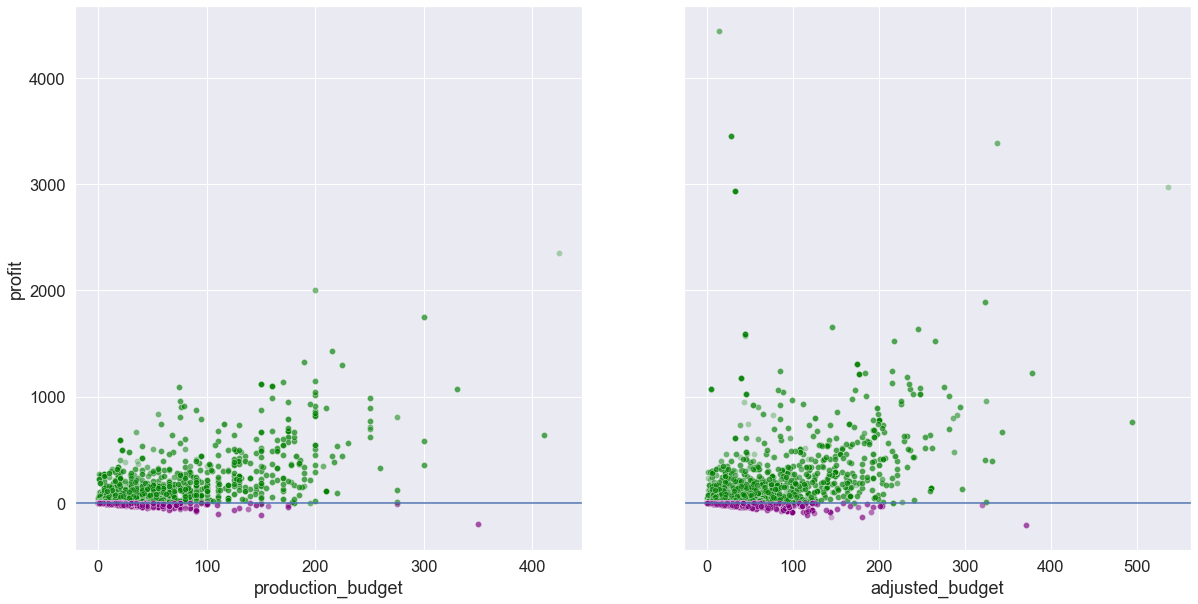

In [25]:
# create graph to visualize correlation data for original data
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

graph1 = sns.scatterplot(
    x=made_profit['production_budget']/1000000,
    y= made_profit['profit']/1000000, 
    color='green', alpha= .3, ax=ax1)

graph2 = sns.scatterplot(
    x=no_profit['production_budget']/1000000,
    y= no_profit['profit']/1000000, 
    color='purple', alpha= .3, ax=ax1)

graph3 = sns.scatterplot(
    x=made_profit['adjusted_budget']/1000000,
    y= made_profit['adjusted_profit']/1000000, 
    color='green', alpha= .3, ax=ax2)

graph4 = sns.scatterplot(
    x=no_profit['adjusted_budget']/1000000,
    y= no_profit['adjusted_profit']/1000000, 
    color='purple', alpha= .3, ax=ax2)

plt.ticklabel_format(axis='y')
plt.ticklabel_format(axis='x')

graph1.axhline(1)
graph3.axhline(1)

fig.set_size_inches(20,10)

# plt.savefig('Profit_vs_budget.png')

The above graphs shows movies that made a profit represented in green and movies that didn't in purple. While there is a relationship between production budget and profit earned, it does not appear to be a strong one. This would require further investigation, which I will do by looking at genres.

In [26]:
# create duplicate dataframe without movies that did not make a profit
df_genre_profits = df.loc[df['profit'] >= 1].sort_values('profit', ascending=False).reset_index()
df_genre_profits

,index,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross,profit,adjusted_profit,roi
0,3663,Avatar,93.0,Horror,2009,425000000.0,2.776345e+09,5.367944e+08,3.506651e+09,2.351345e+09,2.969856e+09,6.532577
1,5736,Titanic,NaN,Adventure,1997,200000000.0,2.208208e+09,3.376573e+08,3.728089e+09,2.008208e+09,3.390431e+09,11.041042
2,5737,Titanic,115.0,Family,1997,200000000.0,2.208208e+09,3.376573e+08,3.728089e+09,2.008208e+09,3.390431e+09,11.041042
3,6979,Avengers: Infinity War,149.0,Action,2018,300000000.0,2.048134e+09,3.237305e+08,2.210145e+09,1.748134e+09,1.886415e+09,6.827114
4,6980,Avengers: Infinity War,149.0,Adventure,2018,300000000.0,2.048134e+09,3.237305e+08,2.210145e+09,1.748134e+09,1.886415e+09,6.827114
...,...,...,...,...,...,...,...,...,...,...,...,...
4544,697,Sunday,65.0,Crime,1997,450000.0,4.503490e+05,7.597290e+05,7.603182e+05,3.490000e+02,5.892120e+02,1.000776
4545,698,Sunday,65.0,Drama,1997,450000.0,4.503490e+05,7.597290e+05,7.603182e+05,3.490000e+02,5.892120e+02,1.000776
4546,702,Sunday,11.0,Family,1997,450000.0,4.503490e+05,7.597290e+05,7.603182e+05,3.490000e+02,5.892120e+02,1.000776
4547,699,Sunday,56.0,Drama,1997,450000.0,4.503490e+05,7.597290e+05,7.603182e+05,3.490000e+02,5.892120e+02,1.000776


In [27]:
df_gp_median = df.groupby('genres', as_index=False).median().sort_values('profit', ascending=False).reset_index()
df_gp_median.loc[:,['genres','adjusted_budget','adjusted_gross', 'profit', 'roi']]

,genres,adjusted_budget,adjusted_gross,profit,roi
0,Animation,8.526772e+07,3.008427e+08,141924811.5,2.969215
1,Adventure,9.915358e+07,2.170237e+08,90571724.0,2.456670
2,Fantasy,5.559689e+07,1.216931e+08,44624635.5,2.230843
3,Action,5.355138e+07,1.101398e+08,36941717.0,1.961365
4,Sci-Fi,4.573005e+07,1.071286e+08,33359310.0,2.370447
5,Family,3.415588e+07,7.502729e+07,29653000.0,2.104418
6,Comedy,2.829076e+07,5.980120e+07,21078541.0,2.151225
7,Mystery,2.119793e+07,4.778471e+07,19282640.0,2.358006
8,Horror,1.137974e+07,4.567351e+07,15610910.5,2.358297
9,Thriller,2.360428e+07,4.683123e+07,13718031.0,1.662493


In [28]:
# create duplicate dataframe grouping movies by genre with production budget, worldwide gross, and profit info
df_gp_adj_median = df.groupby('genres', as_index=False).median().sort_values('adjusted_profit', ascending=False).reset_index()
df_gp_adj_median.loc[:,['genres','adjusted_budget','adjusted_gross', 'adjusted_profit', 'roi']]

,genres,adjusted_budget,adjusted_gross,adjusted_profit,roi
0,Animation,8.526772e+07,3.008427e+08,1.747091e+08,2.969215
1,Adventure,9.915358e+07,2.170237e+08,1.151562e+08,2.456670
2,Fantasy,5.559689e+07,1.216931e+08,5.290285e+07,2.230843
3,Action,5.355138e+07,1.101398e+08,5.117780e+07,1.961365
4,Sci-Fi,4.573005e+07,1.071286e+08,4.754727e+07,2.370447
5,Family,3.415588e+07,7.502729e+07,4.069594e+07,2.104418
6,Comedy,2.829076e+07,5.980120e+07,2.676557e+07,2.151225
7,Mystery,2.119793e+07,4.778471e+07,2.551496e+07,2.358006
8,Horror,1.137974e+07,4.567351e+07,2.317529e+07,2.358297
9,Thriller,2.360428e+07,4.683123e+07,1.612039e+07,1.662493


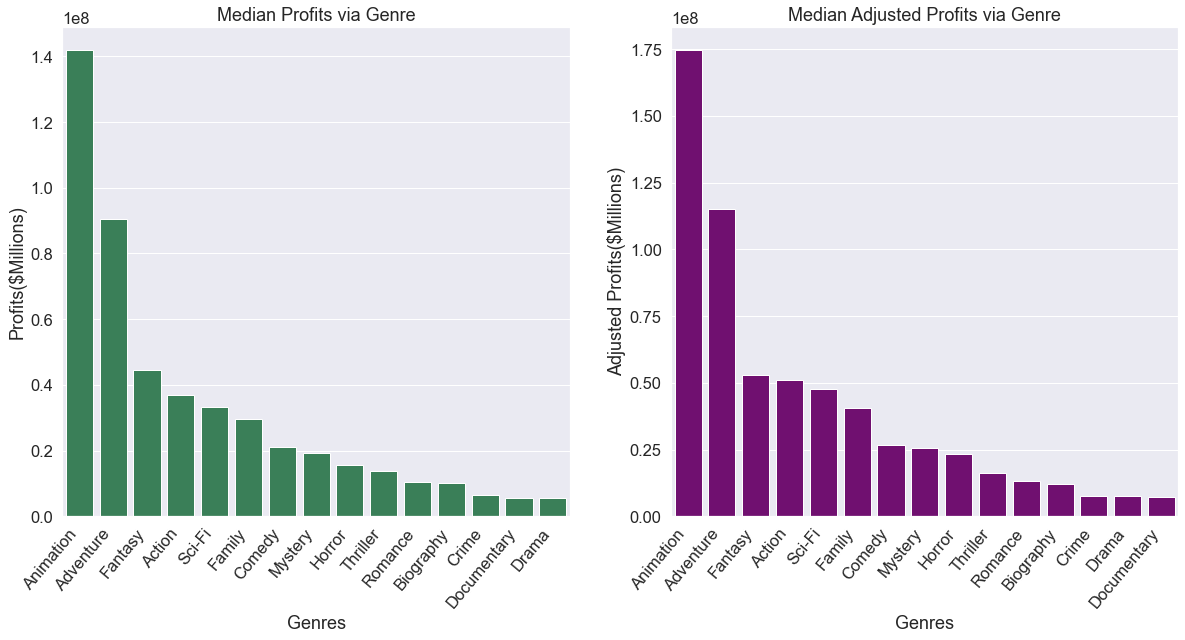

In [41]:
# create graph to visualize median profits vs genre data
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
fig.autofmt_xdate(rotation=50)

sns.barplot(data = df_gp_median,
           x = 'genres',
           y = 'profit',
            ci=None,
           ax=axes[0],
           color='seagreen'
           )

sns.barplot(data = df_gp_adj_median,
           x = 'genres',
           y = 'adjusted_profit',
           ci=None,
           ax=axes[1],
            color='purple'
           )

axes[0].set_title('Median Profits via Genre')
axes[0].set_xlabel('Genres')
axes[0].set_ylabel('Profits($Millions)')

axes[1].set_title('Median Adjusted Profits via Genre')
axes[1].set_xlabel('Genres')
axes[1].set_ylabel('Adjusted Profits($Millions)')

# plt.savefig('MedProf_vs_budget_updated.png')

The median profits via genre graph shows animation, fantasy, adventure, and sci-fi making the most profit. Based solely on profits, Microsoft would want to chose either an animated or adventure film as their first choice. 

***
## Question 2: Which genre provides highest ROI?
***

While profit is important, taking money spend into account is important. Below, a graph of profit ratios via genre will be created for further analysis.

In [44]:
df_roi_median = df.groupby('genres', as_index=False).median().sort_values('roi', ascending=False).reset_index()
df_roi_median.loc[:,['genres','adjusted_budget','adjusted_gross', 'profit', 'roi']]

,genres,adjusted_budget,adjusted_gross,profit,roi
0,Animation,8.526772e+07,3.008427e+08,141924811.5,2.969215
1,Adventure,9.915358e+07,2.170237e+08,90571724.0,2.456670
2,Sci-Fi,4.573005e+07,1.071286e+08,33359310.0,2.370447
3,Horror,1.137974e+07,4.567351e+07,15610910.5,2.358297
4,Mystery,2.119793e+07,4.778471e+07,19282640.0,2.358006
5,Fantasy,5.559689e+07,1.216931e+08,44624635.5,2.230843
6,Comedy,2.829076e+07,5.980120e+07,21078541.0,2.151225
7,Family,3.415588e+07,7.502729e+07,29653000.0,2.104418
8,Romance,1.888293e+07,3.509123e+07,10282876.0,2.007390
9,Action,5.355138e+07,1.101398e+08,36941717.0,1.961365


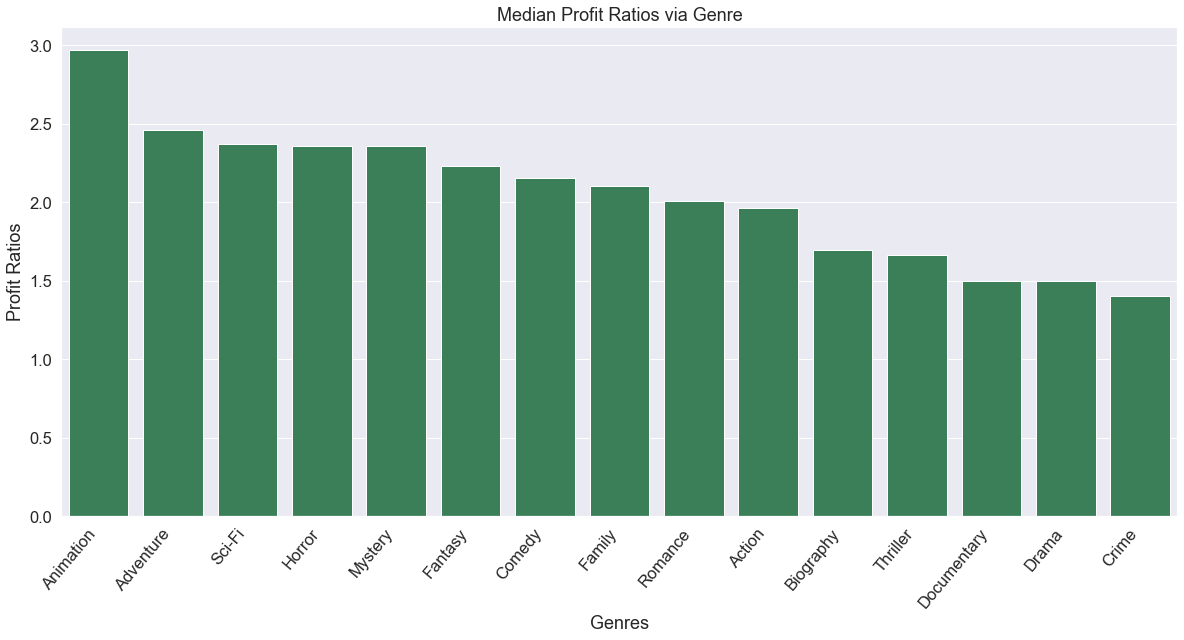

In [46]:
# create graph visualizing profit ratio data
fig, axes = plt.subplots(figsize=(20, 10))
fig.autofmt_xdate(rotation=50)

sns.barplot(data = df_roi_median,
           x = 'genres',
           y = 'roi',
           ci=None,
            color='seagreen'
           )

axes.set_title('Median Profit Ratios via Genre')
axes.set_xlabel('Genres')
axes.set_ylabel('Profit Ratios')

# plt.savefig('Medianratio_vs_genre_updated.png')

This graph shows animation coming in first place with profit ration of about 3:1, adventure in second place at 2.5:1, and sci-fi in third with 2.4:1. It seems that between profit and return on investment, animation would be the best choice for Microsoft's first movie.

***
## Question 3: Is there a correlation between runtime and ROI?
***


In [31]:
# create dataframe of movies that earned a profit
df_rt_prof = df.loc[df['adjusted_profit'] >= 1]
df_rt_prof

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross,profit,adjusted_profit,roi
3,Mortal Kombat,NaN,Action,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08,102133227.0,1.815948e+08,6.106661
4,Mortal Kombat,NaN,Adventure,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08,102133227.0,1.815948e+08,6.106661
5,Mortal Kombat,NaN,Fantasy,1995,20000000.0,122133227.0,3.556037e+07,2.171551e+08,102133227.0,1.815948e+08,6.106661
7,The Overnight,79.0,Comedy,2015,200000.0,1165996.0,2.286503e+05,1.333026e+06,965996.0,1.104376e+06,5.829980
8,The Overnight,79.0,Mystery,2015,200000.0,1165996.0,2.286503e+05,1.333026e+06,965996.0,1.104376e+06,5.829980
...,...,...,...,...,...,...,...,...,...,...,...
7862,Diner,NaN,Crime,1982,5000000.0,12592907.0,1.403990e+07,3.536062e+07,7592907.0,2.132073e+07,2.518581
7863,Traitor,110.0,Action,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07,5882226.0,7.403087e+06,1.267374
7864,Traitor,110.0,Drama,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07,5882226.0,7.403087e+06,1.267374
7865,Traitor,110.0,Romance,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07,5882226.0,7.403087e+06,1.267374


In [32]:
# create dataframe of movies that didn't make a profit
df_rt_noprof = df.loc[df['adjusted_profit'] <= 1]
df_rt_noprof

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross,profit,adjusted_profit,roi
0,Foodfight!,91.0,Action,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0,-5.302263e+07,0.001638
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0,-5.302263e+07,0.001638
2,Foodfight!,91.0,Comedy,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0,-5.302263e+07,0.001638
9,On the Road,124.0,Adventure,2013,25000000.0,9313302.0,2.907940e+07,1.083301e+07,-15686698.0,-1.824639e+07,0.372532
10,On the Road,124.0,Drama,2013,25000000.0,9313302.0,2.907940e+07,1.083301e+07,-15686698.0,-1.824639e+07,0.372532
...,...,...,...,...,...,...,...,...,...,...,...
7853,What Just Happened,96.0,Comedy,2008,27000000.0,2412123.0,3.398090e+07,3.035782e+06,-24587877.0,-3.094512e+07,0.089338
7855,Good,83.0,Documentary,2008,16000000.0,31631.0,2.013683e+07,3.980926e+04,-15968369.0,-2.009702e+07,0.001977
7856,Salvador,71.0,Drama,1986,4500000.0,1500000.0,1.112559e+07,3.708531e+06,-3000000.0,-7.417062e+06,0.333333
7859,The Blue Bird,84.0,Drama,1976,1200000.0,887000.0,5.714657e+06,4.224084e+06,-313000.0,-1.490573e+06,0.739167


In [33]:
# remove missing runtime entires
df_rt_prof.dropna(axis=0, subset=['runtime_minutes'], inplace=True)
df_rt_prof

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross,profit,adjusted_profit,roi
7,The Overnight,79.0,Comedy,2015,200000.0,1165996.0,2.286503e+05,1.333026e+06,965996.0,1.104376e+06,5.829980
8,The Overnight,79.0,Mystery,2015,200000.0,1165996.0,2.286503e+05,1.333026e+06,965996.0,1.104376e+06,5.829980
17,The Secret Life of Walter Mitty,114.0,Adventure,2013,91000000.0,187861183.0,1.058490e+08,2.185156e+08,96861183.0,1.126666e+08,2.064409
18,The Secret Life of Walter Mitty,114.0,Comedy,2013,91000000.0,187861183.0,1.058490e+08,2.185156e+08,96861183.0,1.126666e+08,2.064409
19,The Secret Life of Walter Mitty,114.0,Drama,2013,91000000.0,187861183.0,1.058490e+08,2.185156e+08,96861183.0,1.126666e+08,2.064409
...,...,...,...,...,...,...,...,...,...,...,...
7857,Stay Alive,72.0,Documentary,2006,20000000.0,23187506.0,2.688194e+07,3.116626e+07,3187506.0,4.284318e+06,1.159375
7863,Traitor,110.0,Action,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07,5882226.0,7.403087e+06,1.267374
7864,Traitor,110.0,Drama,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07,5882226.0,7.403087e+06,1.267374
7865,Traitor,110.0,Romance,2008,22000000.0,27882226.0,2.768814e+07,3.509123e+07,5882226.0,7.403087e+06,1.267374


In [34]:
# remove entries of movies with runtime less than 60 minutes
df_rt_prof = df_rt_prof[df_rt_prof['runtime_minutes'] > 60]
df_rt_noprof = df_rt_noprof[df_rt_noprof['runtime_minutes'] > 60]

In [35]:
# calculate correlation between runtime and roi
runtime_roi_prof = df_rt_prof['runtime_minutes'].corr(df_rt_prof['roi'])
runtime_roi_noprof = df_rt_noprof['runtime_minutes'].corr(df_rt_noprof['roi'])
print(f'There is a {runtime_roi_prof} corrlation between profitable movie runtime minutes and roi.')
print(f'There is a {runtime_roi_noprof} correlation between non-profitable movie runtime minutes and roi.')

There is a -0.06222572684869518 corrlation between profitable movie runtime minutes and roi.
There is a 0.08340148898845282 correlation between non-profitable movie runtime minutes and roi.


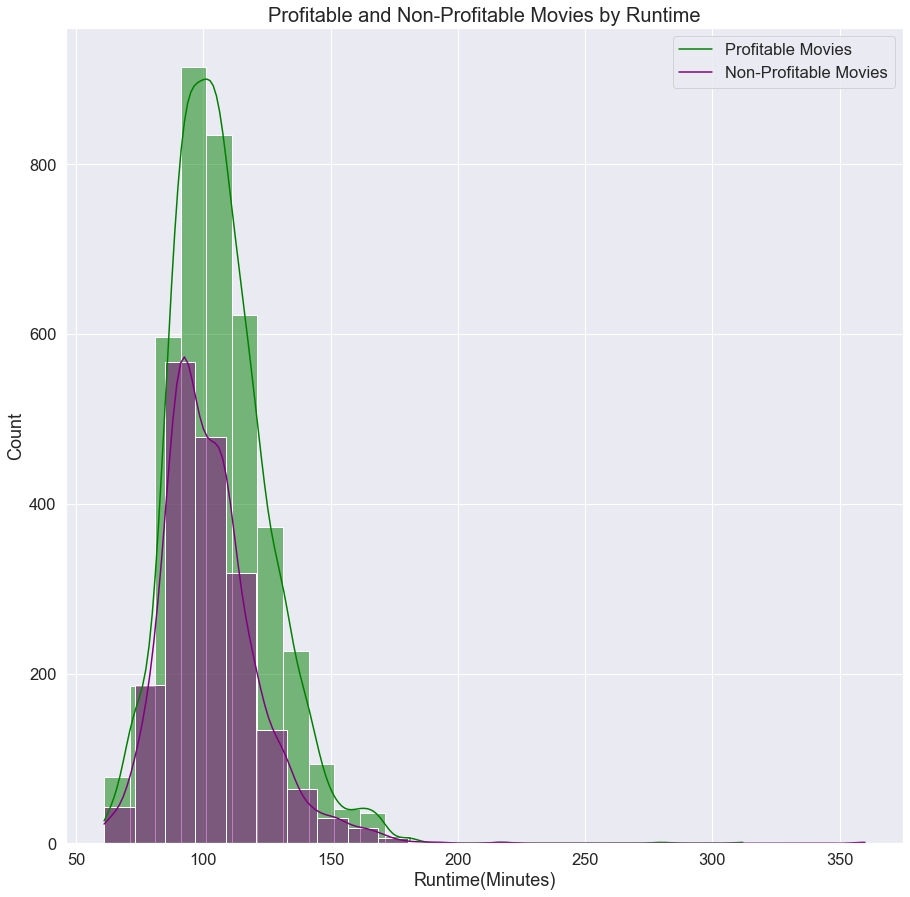

In [36]:
# create visualization of correlation data
fig, ax = plt.subplots(figsize = (15,15))

sns.histplot(data=df_rt_prof, x="runtime_minutes", color="green", bins=25, kde=True)
plt.xlabel("Runtime(Minutes)")
plt.title("Profitable and Non-Profitable Movies by Runtime", size=20)

sns.histplot(data=df_rt_noprof, x="runtime_minutes", color="purple", alpha=0.5, bins=25, kde=True)
plt.legend(labels=["Profitable Movies","Non-Profitable Movies"])

# plt.savefig('Prof_vs_Noprof_RT.png')

The above graph shows a right skewed distribution. Runtimes of 90 to 120 minutes for both profitable and non-profitable movies appear to be the most successful. It would be helpful to look strictly at Animation movies, as those have showen to provide the highest profit and return on investment.

In [37]:
# look only at animation movies that made profit
df_ani_rtroi = df_rt_prof.loc[df_rt_prof['genres'] == 'Animation']
df_ani_rtroi

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross,profit,adjusted_profit,roi
35,Tangled,100.0,Animation,2010,260000000.0,5.864772e+08,3.230922e+08,7.287932e+08,326477240.0,4.057010e+08,2.255682
56,Toy Story 3,103.0,Animation,2010,200000000.0,1.068880e+09,2.485325e+08,1.328256e+09,868879522.0,1.079724e+09,5.344398
81,Puss in Boots,90.0,Animation,2011,130000000.0,5.549875e+08,1.566029e+08,6.685588e+08,424987477.0,5.119559e+08,4.269134
117,The Smurfs,103.0,Animation,2011,110000000.0,5.637493e+08,1.325101e+08,6.791137e+08,453749323.0,5.466035e+08,5.124994
153,The Croods,98.0,Animation,2013,135000000.0,5.730684e+08,1.570288e+08,6.665795e+08,438068425.0,5.095507e+08,4.244951
...,...,...,...,...,...,...,...,...,...,...,...
7346,Hotel Transylvania 3: Summer Vacation,97.0,Animation,2018,65000000.0,5.270800e+08,7.014161e+07,5.687729e+08,462079962.0,4.986313e+08,8.108922
7349,White Fang,85.0,Animation,1991,14000000.0,3.472909e+07,2.785301e+07,6.909355e+07,20729091.0,4.124054e+07,2.480649
7558,Smallfoot,96.0,Animation,2018,80000000.0,2.136913e+08,8.632814e+07,2.305946e+08,133691277.0,1.442665e+08,2.671141
7604,Wonder Park,85.0,Animation,2019,100000000.0,1.151494e+08,1.059897e+08,1.220465e+08,15149422.0,1.605682e+07,1.151494


In [38]:
# look only at animation movies that didn't made profit
df_ani_rtroinp = df_rt_noprof.loc[df_rt_noprof['genres'] == 'Animation']
df_ani_rtroinp

,primary_title,runtime_minutes,genres,release_date,production_budget,worldwide_gross,adjusted_budget,adjusted_gross,profit,adjusted_profit,roi
1,Foodfight!,91.0,Animation,2012,45000000.0,73706.0,5.310962e+07,8.698884e+04,-44926294.0,-5.302263e+07,0.001638
684,Underdogs,106.0,Animation,2013,2500000.0,1392649.0,2.907940e+06,1.619896e+06,-1107351.0,-1.288044e+06,0.557060
870,Lost and Found,111.0,Animation,1999,14000000.0,6552255.0,2.277059e+07,1.065705e+07,-7447745.0,-1.211354e+07,0.468018
1655,Mars Needs Moms,88.0,Animation,2011,150000000.0,39549758.0,1.806957e+08,4.764313e+07,-110450242.0,-1.330525e+08,0.263665
2351,Pinocchio,75.0,Animation,2002,45000000.0,31681811.0,6.778016e+07,4.771996e+07,-13318189.0,-2.006020e+07,0.704040
3887,Space Pirate Captain Harlock,100.0,Animation,2013,30000000.0,310985.0,3.489528e+07,3.617303e+05,-29689015.0,-3.453355e+07,0.010366
4269,UglyDolls,87.0,Animation,2019,45000000.0,24644664.0,4.769535e+07,2.612080e+07,-20355336.0,-2.157455e+07,0.547659
4306,The House,72.0,Animation,2017,40000000.0,31192425.0,4.421834e+07,3.448193e+07,-8807575.0,-9.736409e+06,0.779811
4783,A.C.O.R.N.S.: Operation Crackdown,83.0,Animation,2016,8500000.0,1353287.0,9.596574e+06,1.527873e+06,-7146713.0,-8.068701e+06,0.159210
5601,Anomalisa,90.0,Animation,2015,8000000.0,5706168.0,9.146011e+06,6.523584e+06,-2293832.0,-2.622426e+06,0.713271


In [39]:
# calculate correlation between animation movie runtime and roi
ani_rt_roi_prof = df_ani_rtroi['runtime_minutes'].corr(df_ani_rtroi['roi'])
ani_rt_roi_noprof = df_ani_rtroinp['runtime_minutes'].corr(df_ani_rtroinp['roi'])
print(f'There is a {runtime_roi_prof} corrlation between profitable animation movie runtime minutes and roi.')
print(f'There is a {runtime_roi_noprof} correlation between non-profitable animation movie runtime minutes and roi.')

There is a -0.06222572684869518 corrlation between profitable animation movie runtime minutes and roi.
There is a 0.08340148898845282 correlation between non-profitable animation movie runtime minutes and roi.


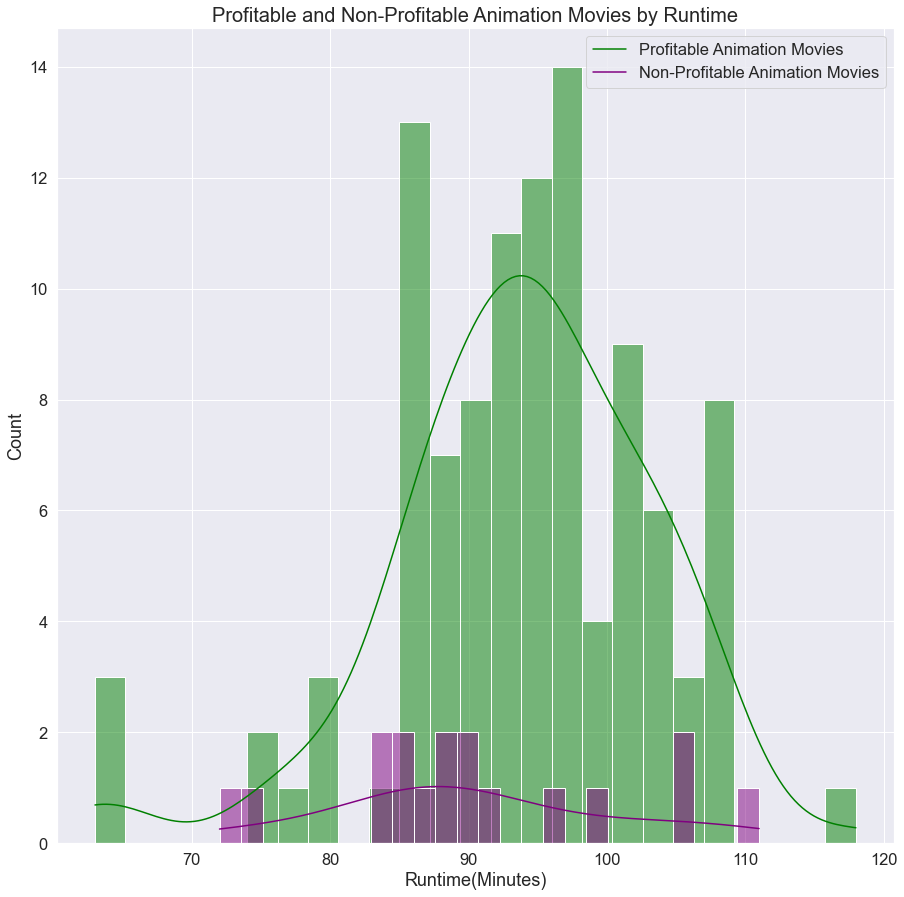

In [40]:
# create visualization of animation runtime vs. roi correlation data
fig, ax = plt.subplots(figsize = (15,15))

sns.histplot(data=df_ani_rtroi, x="runtime_minutes", color="green", bins=25, kde=True)
plt.xlabel("Runtime(Minutes)")
plt.title("Profitable and Non-Profitable Animation Movies by Runtime", size=20)

sns.histplot(data=df_ani_rtroinp, x="runtime_minutes", color="purple", alpha=0.5, bins=25, kde=True)
plt.legend(labels=["Profitable Animation Movies","Non-Profitable Animation Movies"])

# plt.savefig('Prof_vs_Noprof_Ani_RT.png')

Looking strictly at Animation movies, the above graph displays a slightly left-skewed distribution. Based on the above graph, a recommendation of movie runtimes between 90 to 98 minutes would be made.

## Evaluation
***
Movie data was pulled from IMDB and The Numbers for analysis in order to provide recommendations to Microsoft for their new Movie Studio. The goal of this analysis was to determine which genre(s) produce the most profit, the highest return on investment, and ideal movie runtime. When looking at profit and return on investment, data was visualized in raw form as well as after being adjusted for inflation to 2021.

When looking at profits earned, Animation and Fantasy movies were shown to produce the highest profit in the box office. With these two genres being so close in profit, the analysis dug deeper to investigate return on investment. Animation movies were shown to provide a 3:1 return, making them the recommended genre for Microsoft's first production.

After establishing the genre recommendation, investigating the ideal runtime took place. Initially, all genres were considered when looking at the success rates of various runtimes. This provided an ideal range of 90 to 120 minutes. That analysis and visualization was then narrowed down to just Animation movies to see if a more specific recommendation could be discovered. The final look at Animation movie runtimes provides a recommended movie length of 90 to 98 minutes. 

## Conclusions
Based on the provided data analysis, the following is recommended:
* For maximum potential profit: Animation or Adventure genres
* For maximum potential return on investment: Animation genre
* Ideal runtime in minutes: 90-98
***
Microsoft Movie Studio is just beginning so further research may be necessary. This analysis aims to provide Microsoft with strong business recommendations for their first production but it does not cover all potential areas of interests. Further suggested analysis would include optimal release month, success rates of various directors and actors, and impact on movie success by critic reviews. 